In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
RANDOM_SEED = 42

## Project instructions

### 1. Preparing the data

#### 1.1. Reading data

Read the train dataset  `kddCupTrain.csv` from `kddCupData.zip` and check it for missing values.

In [ ]:
kddCupTrain = pd.read_csv('/content/kddCupTrain.csv',header=None)
print("Shape of kddCupTrain: ",kddCupTrain.shape)
print("There are any missing values: ", kddCupTrain.isnull().values.any())
print(kddCupTrain.head(3))

Shape of kddCupTrain:  (985262, 42)
There are any missing values:  False
   0    1     2   3    4      5   6   7   8   9   ...  32   33   34   35   36  \
0   0  tcp  http  SF  215  45076   0   0   0   0  ...   0  0.0  0.0  0.0  0.0   
1   0  tcp  http  SF  162   4528   0   0   0   0  ...   1  1.0  0.0  1.0  0.0   
2   0  tcp  http  SF  236   1228   0   0   0   0  ...   2  1.0  0.0  0.5  0.0   

    37   38   39   40       41  
0  0.0  0.0  0.0  0.0  normal.  
1  0.0  0.0  0.0  0.0  normal.  
2  0.0  0.0  0.0  0.0  normal.  

[3 rows x 42 columns]


The train dataset contains instances of only two class types from the [original](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) data:
- "normal." - no attack
- "ipsweep." - a subtype of "probe" or Probing Attack type.

In [ ]:
kddCupTrain.iloc[:,-1].unique()

array(['normal.', 'ipsweep.'], dtype=object)

Rename column '41' to 'Class' and transform its values from symbolic type fo binary:
- "normal." to 0
- "ipsweep." to 1

In [ ]:
kddCupTrain.rename(columns={41:'Class'}, inplace=True)
kddCupTrain['Class'] = np.where(kddCupTrain['Class'] == 'normal.', 0, 1)

Check counts of classes.

In [ ]:
count_classes = pd.value_counts(kddCupTrain['Class'], sort = True)
print(count_classes)

0    972781
1     12481
Name: Class, dtype: int64


The dataset is highly imbalanced. Normal connections overwhelmingly outnumber fraudulent ones.
This suggests using an autoencoder to detect attacks as rare deviations from normal.

#### 1.2. Remove the uninformative columns

Look at summaries of numeric features.

In [ ]:
print(kddCupTrain.describe(percentiles=[]))

                   0             4             5              6         7  \
count  985262.000000  9.852620e+05  9.852620e+05  985262.000000  985262.0   
mean      215.078631  1.459258e+03  3.193730e+03       0.000007       0.0   
std      1343.633640  1.097984e+05  3.401613e+04       0.002665       0.0   
min         0.000000  0.000000e+00  0.000000e+00       0.000000       0.0   
50%         0.000000  2.300000e+02  4.060000e+02       0.000000       0.0   
max     58329.000000  8.958152e+07  1.173059e+07       1.000000       0.0   

                   8              9             10             11  \
count  985262.000000  985262.000000  985262.000000  985262.000000   
mean        0.000036       0.048908       0.000097       0.710185   
std         0.015897       0.926008       0.013058       0.453677   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       1.000000   
max        14.000000      77.000000       4.00

In [ ]:
columnsList = kddCupTrain.columns[(kddCupTrain.min() == kddCupTrain.max()) & (kddCupTrain.std() == 0)]

print(columnsList)

Index([7, 19], dtype='object')


<ipython-input-7-51dc0ab5f937>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  columnsList = kddCupTrain.columns[(kddCupTrain.min() == kddCupTrain.max()) & (kddCupTrain.std() == 0)]


In [ ]:
kddCupTrain.drop(columnsList, axis=1, inplace=True)

After removing uninformative variables and replacing character variables with hot encoding the dataset contains 83 numeric features.

#### 1.4. Standardize the training dataset

Create a list of features, standardize the features columns using `sklearn.preprocessing.StandardScaler`.

**Further steps are similar to those covered in the notebook `iLykei_DSBusinessIntelligence_CourseProject_FraudDetection.ipynb`.**

In [ ]:
kddCupTrain.columns = kddCupTrain.columns.astype(str)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
scaler.fit(kddCupTrain[numeric_columns])

kddCupTrain[numeric_columns] = scaler.transform(kddCupTrain[numeric_columns])
kddCupTrain

,0,4,5,6,8,9,10,11,12,13,...,3_REJ,3_RSTO,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH,Class
0,-0.160072,-0.011332,1.231248,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,1,0,0
1,-0.160072,-0.011815,0.039225,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,1,0,0
2,-0.160072,-0.011141,-0.057788,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,1,0,0
3,-0.160072,-0.011168,-0.034152,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,1,0,0
4,-0.160072,-0.011114,-0.079601,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985257,-0.160072,-0.011360,-0.026627,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,1,0,0
985258,-0.160072,-0.011296,-0.086951,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,1,0,0
985259,-0.160072,-0.011305,0.012237,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,1,0,0
985260,-0.160072,-0.011296,-0.057612,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,1,0,0


#### 1.5. Split the data into train and test subsets

Use `sklearn.model_selection.train_test_split()` function. Reserve 20% of data for the test data. Do not forget to set the parameter `stratify` to keep the class size ratio within each of data sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_split, X_test_split = train_test_split(kddCupTrain, test_size=0.2,
                                   stratify=kddCupTrain['Class'],
                                   random_state=RANDOM_SEED)

#### 1.6. Detach the labels from the train and the test datasets

In [ ]:
y_train = X_train_split['Class']
X_train = X_train_split.drop(['Class'], axis=1)

y_test = X_test_split['Class']
X_test = X_test_split.drop(['Class'], axis=1)
print('Train: shape X',X_train.shape,', shape Y',y_train.shape)
print('Test: shape X',X_test.shape,', shape Y',y_test.shape)

Train: shape X (788209, 83) , shape Y (788209,)
Test: shape X (197053, 83) , shape Y (197053,)


#### 1.7. Separate the "normal" instances

An autoencoder will be trained to reconstruct class "normal". Separate the "normal" instances in both `train` and `test` datasets.

In [ ]:
X_trainNorm = X_train[y_train == 0]
X_trainNorm_val = X_trainNorm.values
X_testNorm_val = X_test[y_test == 0].values

In [ ]:
print(y_train.shape)
print(X_train.shape)
X_trainNorm_val.shape

(788209,)
(788209, 83)


(778224, 83)

### 2. Build the model

Follow the steps of  `iLykei_DSBusinessIntelligence_CourseProject_FraudDetection.ipynb` to create similar model for this project.

#### 2.1. select architecture of autoencoder

Try different numbers and dimentions of layers. Use `BatchNormalization` and `Dropout` layers to achieve better results.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model

In [ ]:
#Set parameters:
input_dim = X_trainNorm_val.shape[1]
layer1_dim = 14
encoder_dim = 7

In [ ]:
input_layer = Input(shape=(input_dim, ))

encoder1 = Dense(layer1_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder2 = Dense(encoder_dim, activation="relu")(encoder1)
# encoder2 = BatchNormalization()(encoder2)
# encoder2 = Dropout(0.2)(encoder2)
decoder1 = Dense(layer1_dim, activation='tanh')(encoder2)
decoder2 = Dense(input_dim, activation='linear')(decoder1)
print('input_layer: ',input_layer)
print('encoder1',encoder1)
print('encoder2',encoder2)
print('decoder1',decoder1)
print('decoder2',decoder2)

input_layer:  KerasTensor(type_spec=TensorSpec(shape=(None, 83), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
encoder1 KerasTensor(type_spec=TensorSpec(shape=(None, 14), dtype=tf.float32, name=None), name='dense/Tanh:0', description="created by layer 'dense'")
encoder2 KerasTensor(type_spec=TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), name='dense_1/Relu:0', description="created by layer 'dense_1'")
decoder1 KerasTensor(type_spec=TensorSpec(shape=(None, 14), dtype=tf.float32, name=None), name='dense_2/Tanh:0', description="created by layer 'dense_2'")
decoder2 KerasTensor(type_spec=TensorSpec(shape=(None, 83), dtype=tf.float32, name=None), name='dense_3/BiasAdd:0', description="created by layer 'dense_3'")


In [ ]:
autoencoder = Model(inputs=input_layer, outputs=decoder2)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 83)]              0         
                                                                 
 dense (Dense)               (None, 14)                1176      
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 14)                112       
                                                                 
 dense_3 (Dense)             (None, 83)                1245      
                                                                 
Total params: 2,638
Trainable params: 2,638
Non-trainable params: 0
_________________________________________________________________


#### 2.2. Fit the model

Fit autoencoder to the "normal" instances of the train dataset.
Use `ModelCheckpoint` callback to save the best model to file:

`checkpointer = ModelCheckpoint(filepath="autoencoder.h5",
                               verbose=0,
                               save_best_only=True)`

In [ ]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error')

checkpointer = ModelCheckpoint(filepath="autoencoder.h5", verbose=0, save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=3, verbose=0) # 'patience' number of not improving epochs
history = autoencoder.fit(X_trainNorm_val, X_trainNorm_val,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_testNorm_val, X_testNorm_val),
                    verbose=1,
                    callbacks=[checkpointer, #tensorboard,
                               earlystopping]).history

Epoch 1/100
24320/24320 [==============================] - 56s 2ms/step - loss: 0.2121 - val_loss: 0.1993
Epoch 2/100
24320/24320 [==============================] - 61s 2ms/step - loss: 0.1832 - val_loss: 0.1887
Epoch 3/100
24320/24320 [==============================] - 65s 3ms/step - loss: 0.1750 - val_loss: 0.1844
Epoch 4/100
24320/24320 [==============================] - 59s 2ms/step - loss: 0.1717 - val_loss: 0.1825
Epoch 5/100
24320/24320 [==============================] - 60s 2ms/step - loss: 0.1698 - val_loss: 0.1820
Epoch 6/100
24320/24320 [==============================] - 63s 3ms/step - loss: 0.1687 - val_loss: 0.1802
Epoch 7/100
24320/24320 [==============================] - 59s 2ms/step - loss: 0.1678 - val_loss: 0.1798
Epoch 8/100
24320/24320 [==============================] - 59s 2ms/step - loss: 0.1672 - val_loss: 0.1833
Epoch 9/100
24320/24320 [==============================] - 59s 2ms/step - loss: 0.1664 - val_loss: 0.1780
Epoch 10/100
24320/24320 [====================

### 3. Evaluation

#### 3.1. Load the fitted autoencoder from file `"autoencoder.h5"`.

In [ ]:
autoencoder = load_model('autoencoder.h5')

#### 3.2.  Reconstruction

Reconstruct the **test** dataset using the fitted autoencoder, calculate the **mean squared error** of the prediction.

In [ ]:
testPredictions = autoencoder.predict(X_test)
X_test.shape,testPredictions.shape

6158/6158 [==============================] - 9s 1ms/step


((197053, 83), (197053, 83))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
testMSE = mean_squared_error(X_test.transpose(), testPredictions.transpose(),
                              multioutput='raw_values')
error_df = pd.DataFrame({'reconstruction_error': testMSE,'true_class': y_test})
error_df.head()

,reconstruction_error,true_class
940543,0.131579,1
356110,0.059699,0
540178,0.001855,0
672514,0.005898,0
244980,0.002207,0


In [ ]:
from sklearn.metrics import (confusion_matrix, auc, roc_curve, cohen_kappa_score, accuracy_score)
import matplotlib.pyplot as plt

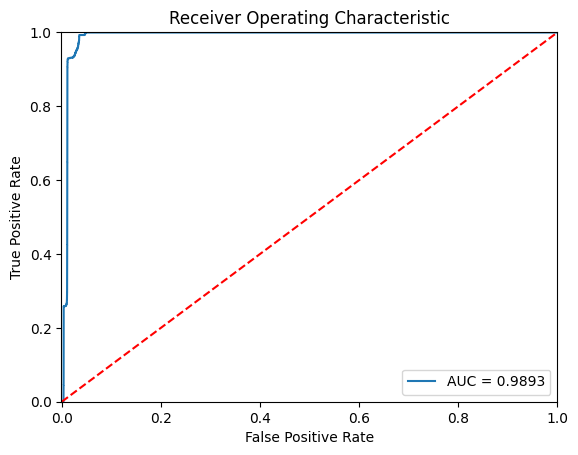

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 3.3. Evaluate

Calculate MSE of each observation by averaging squared errors of reconstruction of all features in a row.

Calculate ROC and AUC. Select appropriate quantile and calculate Accuracy and Cohen's Kappa.

Tune parameters of autoencoder to achieve better results (see Section 2.1.). Try to make AUC = 0.97 or better to get a good score.

### 4.Create submission

#### 4.1. Read test data

Read the **test** dataset from ['kddCupTest.csv'](kddCupTest.csv) and check it for missing values.

In [ ]:
featuresList = [str(item) for item in featuresList]

In [ ]:
kddCupTest = pd.read_csv('/content/kddCupTest.csv', header=None)
print(kddCupTest.head(3))

   0    1        2   3     4      5   6   7   8   9   ...   31   32    33  \
0   0  tcp     http  SF   230  10066   0   0   0   0  ...  255  255  1.00   
1   0  udp  private  SF   105    145   0   0   0   0  ...  255  227  0.89   
2   1  tcp     smtp  SF  1888    374   0   0   0   0  ...  255  174  0.68   

     34   35   36   37   38   39   40  
0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.01  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.03  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 41 columns]


In [ ]:
kddCupTest.drop(columnsList, axis=1, inplace=True)
print(kddCupTest.head(3))

   0    1        2   3     4      5   6   8   9   10  ...   31   32    33  \
0   0  tcp     http  SF   230  10066   0   0   0   0  ...  255  255  1.00   
1   0  udp  private  SF   105    145   0   0   0   0  ...  255  227  0.89   
2   1  tcp     smtp  SF  1888    374   0   0   0   0  ...  255  174  0.68   

     34   35   36   37   38   39   40  
0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.01  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.03  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 39 columns]


Notice that there are no lables in the test dataset. The features columns are the same.

#### 4.2. Do "One hot" transformation of categorical features

Don't forget to make the features list exactly the same as in the **train** dataset.

In [ ]:
def add_missing_dummy_columns( d, columns ):
    missing_cols = set( columns ) - set( d.columns )
    for c in missing_cols:
        d[c] = 0

In [ ]:
def fix_columns( d, columns ):

    add_missing_dummy_columns( d, columns )

    # make sure we have all the columns we need
    assert( set( columns ) - set( d.columns ) == set())

    extra_cols = set( d.columns ) - set( columns )
    if extra_cols:
        print("extra columns:", extra_cols)

    d = d[ columns ]
    return d

In [ ]:
kddCupTest = pd.get_dummies(kddCupTest, columns = filtered_columns)

len(kddCupTest.columns)

106

In [ ]:
kddCupTest.columns = kddCupTest.columns.astype(str)

In [ ]:
add_missing_dummy_columns(kddCupTest,featuresList)

len(kddCupTest.columns)

108

In [ ]:
kddCupTest = fix_columns(kddCupTest,featuresList)

len(kddCupTest.columns)

extra columns: {'2_Z39_50', '2_netbios_ns', '2_hostnames', '2_csnet_ns', '2_systat', '2_harvest', '2_daytime', '2_netstat', '2_supdup', '2_uucp', '2_nntp', '2_echo', '2_netbios_ssn', '2_netbios_dgm', '2_sql_net', '2_pm_dump', '2_printer', '2_sunrpc', '2_discard', '2_iso_tsap', '2_bgp', '2_http_2784', '2_uucp_path', '2_vmnet', '2_pop_2'}


83

#### 4.3. Standardize the test dataset

Use the scaler fitted to the training dataset.

In [ ]:
kddCupTest[numeric_columns] = scaler.transform(kddCupTest[numeric_columns])
kddCupTest

,0,4,5,6,8,9,10,11,12,13,...,3_OTH,3_REJ,3_RSTO,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH
0,-0.160072,-0.011196,0.202030,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,0,1,0
1,-0.160072,-0.012334,-0.089626,-0.002665,-0.002235,-0.052816,-0.007462,-1.565399,-0.004408,-0.01751,...,0,0,0,0,0,0,0,0,1,0
2,-0.159328,0.003905,-0.082894,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,0,1,0
3,-0.160072,-0.010285,-0.050468,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,0,1,0
4,1.793586,-0.011961,-0.090802,-0.002665,-0.002235,-0.052816,-0.007462,-1.565399,-0.004408,-0.01751,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196552,-0.160072,-0.013290,-0.093889,-0.002665,-0.002235,-0.052816,-0.007462,-1.565399,-0.004408,-0.01751,...,0,1,0,0,0,0,0,0,0,0
196553,-0.160072,-0.011961,0.068740,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,0,1,0
196554,-0.160072,-0.012334,-0.089597,-0.002665,-0.002235,-0.052816,-0.007462,-1.565399,-0.004408,-0.01751,...,0,0,0,0,0,0,0,0,1,0
196555,-0.160072,-0.010859,0.332262,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,0,0,0,0,0,0,0,0,1,0


#### 4.4. Make predictions and save the results to csv file.

Reconstruct the **kddCupTest** dataset, calculate **mean squared error** as reconstruction error.
Save MSE to scv file.

`result_df = pd.DataFrame({'reconstruction_error': testMSE})
 result_df.to_csv('filename.csv')`

In [ ]:
finalPredictions = autoencoder.predict(kddCupTest)

6143/6143 [==============================] - 9s 1ms/step


In [ ]:
testMSE = mean_squared_error(kddCupTest.transpose(), finalPredictions.transpose(),
                              multioutput='raw_values')
print(testMSE)


[0.00289668 0.00591018 0.01492394 ... 0.00541103 0.00426161 0.00232064]


In [ ]:
result_df = pd.DataFrame({'reconstruction_error': testMSE})
result_df.to_csv('filename.csv')

The format should be as follows:

,reconstruction_error
0,0.019312
1,0.049165
2,0.084997

#### 4.5. Upload the results

Upload the saved file using [shiny test application](https://shiny.ilykei.com/courses/AdvancedML/AutoEncoder).
The uploaded results will be used for calculation of AUC. The goal for this project is to get AUC not less than 0.97.
